<h1><center>Deep Neural Networks Project </center></h1>

Importing the necessary modules.

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

In [48]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

 Verifying that the shape of the image and target arrays are what I expect.


In [49]:
print("Training images shape",train_images.shape)
print("Test images shape",test_images.shape)

Training images shape (50000, 32, 32, 3)
Test images shape (10000, 32, 32, 3)


We now create a list of labels corresponding to the 10 categories.  It will be used to convert the 0-9 digits in the target arrays to string labels. The categories are labeled as follows:

  0. airplane
  1. automobile
  2. bird
  3. cat
  4. deer
  5. dog
  6. frog
  7. horse
  8. ship
  9. truck


In [50]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [51]:
train_images = train_images/255
test_images = test_images/255

In [52]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

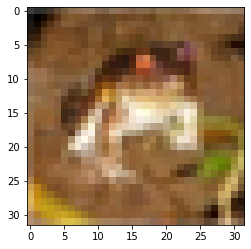

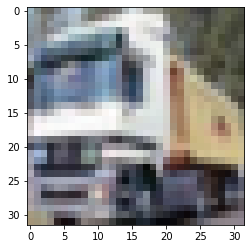

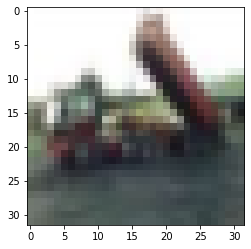

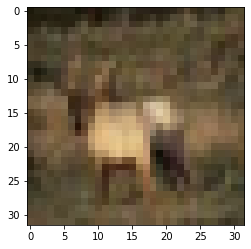

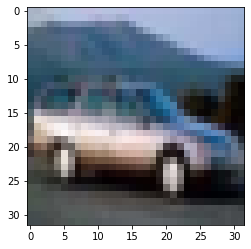

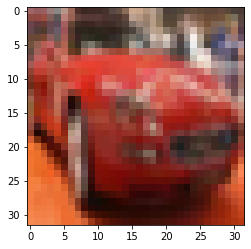

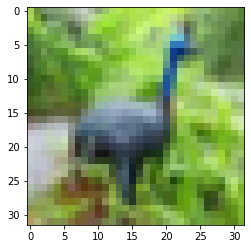

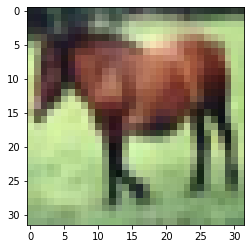

In [53]:
for i in range(8):
  plt.imshow(train_images[i])
  plt.show()



First naive model

In order to better understand the importance of CNNs, it is instructive to first see how well a naive dense network performs on the dataset.

In [54]:
model = Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(Dense(2048, activation='relu', input_dim = 1024))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [55]:
model.compile(loss='categorical_crossentropy', optimizer= 'SGD', metrics=['accuracy'])
history = model.fit(train_images,train_labels,batch_size = 32,epochs = 10, callbacks = EarlyStopping(monitor = 'val_loss',patience= 2),validation_split= 0.1)

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8544 - accuracy: 0.3348 - val_loss: 2.0794 - val_accuracy: 0.2840
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6504 - accuracy: 0.4110 - val_loss: 1.9009 - val_accuracy: 0.3358
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5584 - accuracy: 0.4454 - val_loss: 1.7232 - val_accuracy: 0.3928
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4939 - accuracy: 0.4673 - val_loss: 1.6580 - val_accuracy: 0.4092
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.4406 - accuracy: 0.4865 - val_loss: 1.7359 - val_accuracy: 0.3942
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3947 - accuracy: 0.5044 - val_loss: 1.6321 - val_accuracy: 0.4202
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3539 - accuracy: 0.5196 - val_loss: 1.7649 - val_accuracy:

Text(0.5, 0, 'epochs')

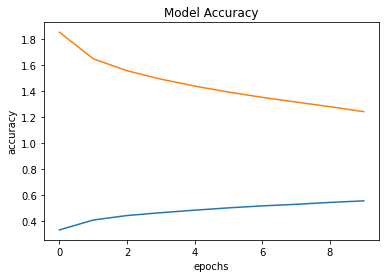

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

313/313 [==============================] - 1s 2ms/step
ACC:  0.6682


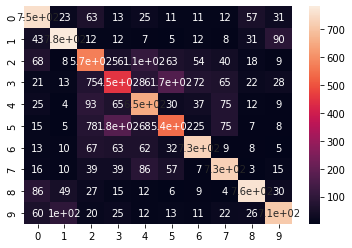

In [57]:
pre = model.predict(test_images)
predicted = []
actual = []
for i in range(len(pre)):
    predicted.append(np.argmax(pre[i]))
    actual.append((np.argmax(test_labels[i])))
print("ACC: ", accuracy_score(actual, predicted))
sns.heatmap(confusion_matrix(actual, predicted), annot=True)

In [58]:
model = Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(Dense(2048, activation='relu', input_dim = 1024))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [59]:
model.compile(loss='categorical_crossentropy', optimizer= 'adamax', metrics=['accuracy'])
history = model.fit(train_images,train_labels,batch_size = 64,epochs = 10,callbacks = EarlyStopping(monitor = 'val_loss',patience= 2), validation_split= 0.1)

Epoch 1/10
704/704 [==============================] - 5s 6ms/step - loss: 2.0171 - accuracy: 0.2306 - val_loss: 1.8772 - val_accuracy: 0.3086
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 1.7805 - accuracy: 0.3512 - val_loss: 1.7023 - val_accuracy: 0.3856
Epoch 3/10
704/704 [==============================] - 4s 6ms/step - loss: 1.6531 - accuracy: 0.4000 - val_loss: 1.6353 - val_accuracy: 0.4176
Epoch 4/10
704/704 [==============================] - 4s 6ms/step - loss: 1.5766 - accuracy: 0.4292 - val_loss: 1.5834 - val_accuracy: 0.4290
Epoch 5/10
704/704 [==============================] - 4s 6ms/step - loss: 1.5224 - accuracy: 0.4512 - val_loss: 1.4981 - val_accuracy: 0.4676
Epoch 6/10
704/704 [==============================] - 4s 6ms/step - loss: 1.4832 - accuracy: 0.4670 - val_loss: 1.4978 - val_accuracy: 0.4592
Epoch 7/10
704/704 [==============================] - 4s 6ms/step - loss: 1.4383 - accuracy: 0.4820 - val_loss: 1.4629 - val_accuracy: 0.4764
Epoch 

Text(0.5, 0, 'epochs')

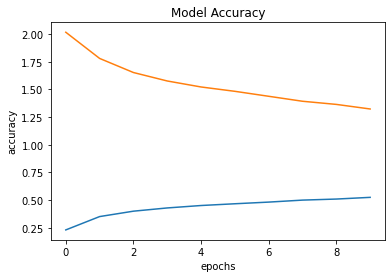

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

313/313 [==============================] - 1s 2ms/step
ACC:  0.6682


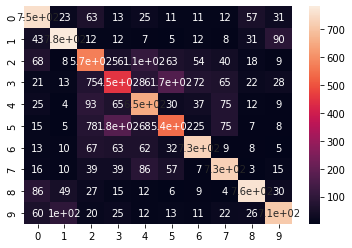

In [61]:
pre = model.predict(test_images)
predicted = []
actual = []
for i in range(len(pre)):
    predicted.append(np.argmax(pre[i]))
    actual.append((np.argmax(test_labels[i])))
print("ACC: ", accuracy_score(actual, predicted))
sns.heatmap(confusion_matrix(actual, predicted), annot=True)

Adding batch normalization after each hidden layer. 

In [62]:
model2 = Sequential()
model2.add(Flatten(input_shape=[32,32,3]))
model2.add(Dense(2048, activation='relu', input_dim = 1024))
model2.add(BatchNormalization())
model2.add(Dense(1024, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [63]:
model2.build(input_shape=(None,32,32,3))
model2.compile(loss='categorical_crossentropy', optimizer= 'SGD', metrics=['accuracy'])
history = model2.fit(train_images,train_labels,batch_size = 32,epochs = 10, callbacks = EarlyStopping(monitor = 'val_loss',patience= 2),validation_split= 0.1)

Epoch 1/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7049 - accuracy: 0.3976 - val_loss: 1.6832 - val_accuracy: 0.4038
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4727 - accuracy: 0.4745 - val_loss: 1.6358 - val_accuracy: 0.4228
Epoch 3/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.3823 - accuracy: 0.5086 - val_loss: 1.7739 - val_accuracy: 0.3870
Epoch 4/10
1407/1407 [==============================] - 8s 5ms/step - loss: 1.3238 - accuracy: 0.5321 - val_loss: 1.5742 - val_accuracy: 0.4554
Epoch 5/10
1407/1407 [==============================] - 8s 5ms/step - loss: 1.2815 - accuracy: 0.5439 - val_loss: 1.6125 - val_accuracy: 0.4394
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2573 - accuracy: 0.5519 - val_loss: 1.9179 - val_accuracy: 0.3814


Text(0.5, 0, 'epochs')

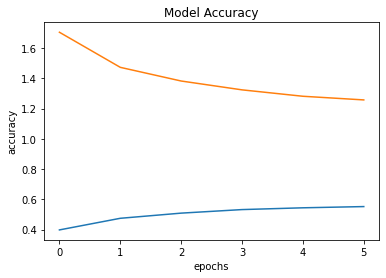

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

313/313 [==============================] - 1s 2ms/step
ACC:  0.6682


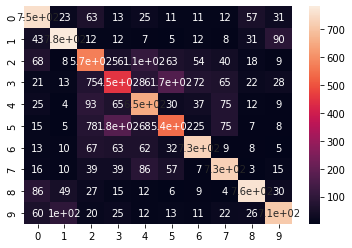

In [65]:
pre = model2.predict(test_images)
predicted = []
actual = []
for i in range(len(pre)):
    predicted.append(np.argmax(pre[i]))
    actual.append((np.argmax(test_labels[i])))
print("ACC: ", accuracy_score(actual, predicted))
sns.heatmap(confusion_matrix(actual, predicted), annot=True)

<a id='cnn'></a>
Convolutional Neural Network
 

Convolutional neural networks allow us to do drastically better on this dataset (and many image classification problems in general). In this task, you will build a convolutional network and see how it performs during training.

In [66]:
cnmodel = Sequential()
cnmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnmodel.add(Conv2D(32, (3, 3), activation='relu'))
cnmodel.add(MaxPooling2D((2, 2)))
cnmodel.add(Conv2D(64, (3, 3), activation='relu',))
cnmodel.add(Conv2D(64, (3, 3), activation='relu',))
cnmodel.add(MaxPooling2D((2, 2)))
cnmodel.add(Flatten(input_shape=[32,32,3]))
cnmodel.add(Dense(512, activation='relu',input_dim = 1024))
cnmodel.add(Dense(10, activation='softmax'))

In [67]:
cnmodel.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [68]:
cnmodel.compile(loss='categorical_crossentropy', optimizer= 'SGD', metrics=['accuracy'])
history = cnmodel.fit(train_images, train_labels,batch_size = 32, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0102 - accuracy: 0.2665 - val_loss: 1.9297 - val_accuracy: 0.3132
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6825 - accuracy: 0.3995 - val_loss: 1.6614 - val_accuracy: 0.4040
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4805 - accuracy: 0.4692 - val_loss: 1.5809 - val_accuracy: 0.4470
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3614 - accuracy: 0.5116 - val_loss: 1.3963 - val_accuracy: 0.5026
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2679 - accuracy: 0.5508 - val_loss: 1.3647 - val_accuracy: 0.5176
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1804 - accuracy: 0.5848 - val_loss: 1.3533 - val_accuracy: 0.5264
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1063 - accuracy: 0.6120 - val_loss: 1.5904 - val_accuracy:

Text(0.5, 0, 'epochs')

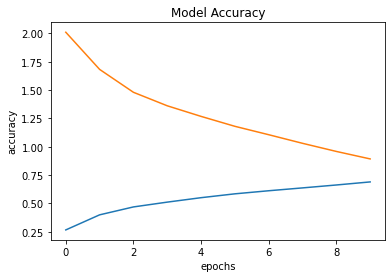

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

313/313 [==============================] - 1s 2ms/step
ACC:  0.5705


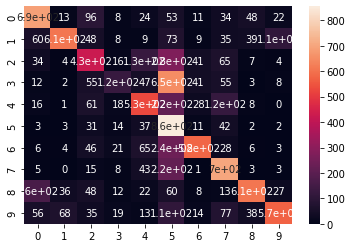

In [70]:
pre = cnmodel.predict(test_images)
predicted = []
actual = []
for i in range(len(pre)):
    predicted.append(np.argmax(pre[i]))
    actual.append((np.argmax(test_labels[i])))
print("ACC: ", accuracy_score(actual, predicted))
sns.heatmap(confusion_matrix(actual, predicted), annot=True)

In [71]:
cnmodel.compile(loss='categorical_crossentropy', optimizer= 'adamax', metrics=['accuracy'])
history = cnmodel.fit(train_images, train_labels,batch_size = 32, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9466 - accuracy: 0.6670 - val_loss: 0.9950 - val_accuracy: 0.6556
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7735 - accuracy: 0.7288 - val_loss: 0.9422 - val_accuracy: 0.6816
Epoch 3/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.6322 - accuracy: 0.7803 - val_loss: 0.9325 - val_accuracy: 0.6942
Epoch 4/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.5010 - accuracy: 0.8255 - val_loss: 1.0064 - val_accuracy: 0.6892
Epoch 5/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.3721 - accuracy: 0.8720 - val_loss: 1.0934 - val_accuracy: 0.6912
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2638 - accuracy: 0.9092 - val_loss: 1.1813 - val_accuracy: 0.6908
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1748 - accuracy: 0.9403 - val_loss: 1.3031 - val_accuracy:

Text(0.5, 0, 'epochs')

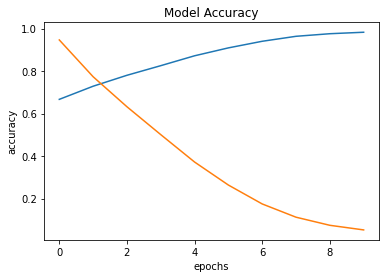

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

313/313 [==============================] - 1s 2ms/step
ACC:  0.6659


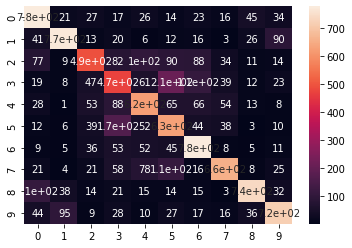

In [73]:
pre = cnmodel.predict(test_images)
predicted = []
actual = []
for i in range(len(pre)):
    predicted.append(np.argmax(pre[i]))
    actual.append((np.argmax(test_labels[i])))
print("ACC: ", accuracy_score(actual, predicted))
sns.heatmap(confusion_matrix(actual, predicted), annot=True)

In [77]:
cnmodel2 = Sequential()
cnmodel2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnmodel2.add(MaxPooling2D((2, 2)))
cnmodel2.add(Conv2D(32, (3, 3), activation='relu'))
cnmodel2.add(MaxPooling2D((2, 2)))
cnmodel2.add(Flatten())
cnmodel2.add(Dense(512, activation='relu'))
cnmodel2.add(Dense(215, activation='relu'))
cnmodel2.add(Dense(105, activation='relu'))
cnmodel2.add(Dropout(0.25))
cnmodel2.add(Dense(10, activation='softmax'))

In [78]:
cnmodel2.compile(loss='categorical_crossentropy', optimizer= 'SGD', metrics=['accuracy'])
history = cnmodel2.fit(train_images, train_labels,batch_size = 32, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0837 - accuracy: 0.2307 - val_loss: 1.9269 - val_accuracy: 0.2992
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7988 - accuracy: 0.3464 - val_loss: 1.6590 - val_accuracy: 0.3932
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5996 - accuracy: 0.4221 - val_loss: 1.4519 - val_accuracy: 0.4666
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4729 - accuracy: 0.4712 - val_loss: 1.6343 - val_accuracy: 0.4120
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3777 - accuracy: 0.5086 - val_loss: 1.3271 - val_accuracy: 0.5254
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3052 - accuracy: 0.5348 - val_loss: 1.2782 - val_accuracy: 0.5410
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2334 - accuracy: 0.5635 - val_loss: 1.2187 - val_accuracy:

Text(0.5, 0, 'epochs')

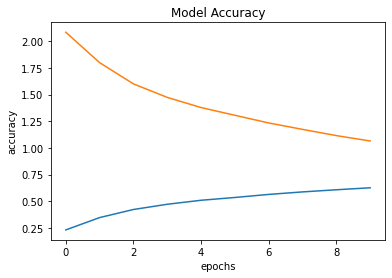

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

313/313 [==============================] - 1s 2ms/step
ACC:  0.6659


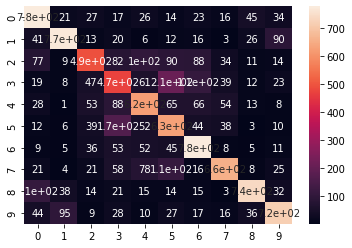

In [80]:
pre = cnmodel.predict(test_images)
predicted = []
actual = []
for i in range(len(pre)):
    predicted.append(np.argmax(pre[i]))
    actual.append((np.argmax(test_labels[i])))
print("ACC: ", accuracy_score(actual, predicted))
sns.heatmap(confusion_matrix(actual, predicted), annot=True)

In [81]:
cnmodel2.compile(loss='categorical_crossentropy', optimizer= 'adamax', metrics=['accuracy'])
history = cnmodel2.fit(train_images, train_labels,batch_size = 32, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 7s 4ms/step - loss: 1.0832 - accuracy: 0.6191 - val_loss: 1.0526 - val_accuracy: 0.6336
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9510 - accuracy: 0.6656 - val_loss: 0.9636 - val_accuracy: 0.6596
Epoch 3/10
1407/1407 [==============================] - 6s 5ms/step - loss: 0.8374 - accuracy: 0.7091 - val_loss: 0.9259 - val_accuracy: 0.6740
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7319 - accuracy: 0.7454 - val_loss: 0.9004 - val_accuracy: 0.6944
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6275 - accuracy: 0.7828 - val_loss: 0.9067 - val_accuracy: 0.6964
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5295 - accuracy: 0.8168 - val_loss: 0.9431 - val_accuracy: 0.7040
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4344 - accuracy: 0.8492 - val_loss: 0.9890 - val_accuracy:

Text(0.5, 0, 'epochs')

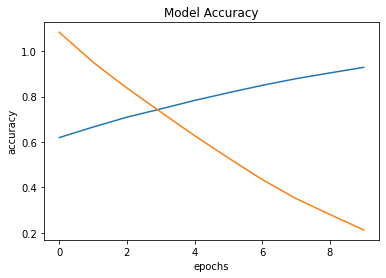

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

313/313 [==============================] - 1s 2ms/step
ACC:  0.6659


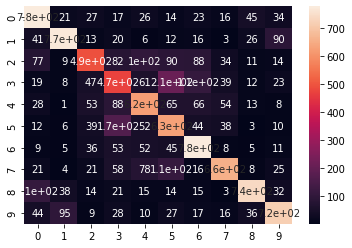

In [83]:
pre = cnmodel.predict(test_images)
predicted = []
actual = []
for i in range(len(pre)):
    predicted.append(np.argmax(pre[i]))
    actual.append((np.argmax(test_labels[i])))
print("ACC: ", accuracy_score(actual, predicted))
sns.heatmap(confusion_matrix(actual, predicted), annot=True)

In [90]:
cnmodel3 = Sequential()
cnmodel3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnmodel3.add(MaxPooling2D((2, 2)))
cnmodel3.add(Conv2D(32, (3, 3), activation='relu'))
cnmodel3.add(MaxPooling2D((2, 2)))
cnmodel3.add(Conv2D(64, (3, 3), activation='relu'))
cnmodel3.add(MaxPooling2D((2, 2)))
cnmodel3.add(Dropout(0.25))
cnmodel3.add(MaxPooling2D((2, 2)))
cnmodel3.add(Flatten())
cnmodel3.add(Dense(512, activation='relu',input_dim = 1024))
cnmodel3.add(Dropout(0.25))
cnmodel3.add(BatchNormalization())
cnmodel3.add(Dense(10, activation='softmax'))

In [86]:
cnmodel3.compile(loss='categorical_crossentropy', optimizer= 'SGD', metrics=['accuracy'])
history = cnmodel3.fit(train_images, train_labels,batch_size = 32, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 8s 5ms/step - loss: 1.7945 - accuracy: 0.3314 - val_loss: 2.0369 - val_accuracy: 0.2856
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5104 - accuracy: 0.4473 - val_loss: 1.4730 - val_accuracy: 0.4664
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3931 - accuracy: 0.4970 - val_loss: 1.6462 - val_accuracy: 0.3958
Epoch 4/10
1407/1407 [==============================] - 6s 5ms/step - loss: 1.3169 - accuracy: 0.5261 - val_loss: 1.3317 - val_accuracy: 0.5252
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2614 - accuracy: 0.5468 - val_loss: 1.5776 - val_accuracy: 0.4182
Epoch 6/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2202 - accuracy: 0.5636 - val_loss: 1.5486 - val_accuracy: 0.4738
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1744 - accuracy: 0.5837 - val_loss: 1.2794 - val_accuracy:

Text(0.5, 0, 'epochs')

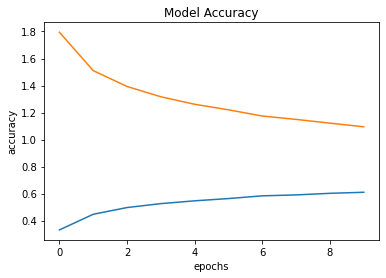

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

313/313 [==============================] - 1s 2ms/step
ACC:  0.6659


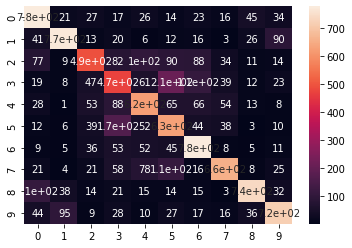

In [89]:
pre = cnmodel3.predict(test_images)
predicted = []
actual = []
for i in range(len(pre)):
    predicted.append(np.argmax(pre[i]))
    actual.append((np.argmax(test_labels[i])))
print("ACC: ", accuracy_score(actual, predicted))
sns.heatmap(confusion_matrix(actual, predicted), annot=True)

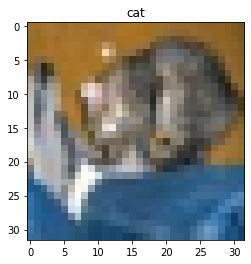

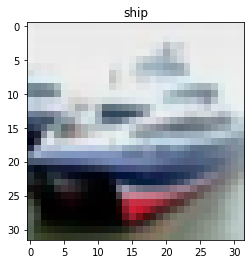

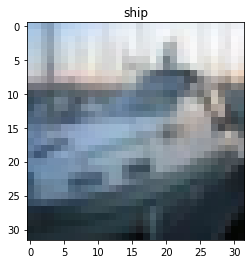

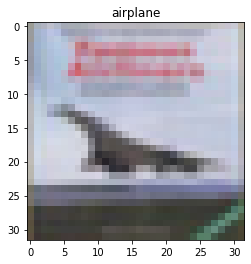

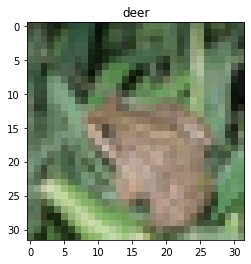

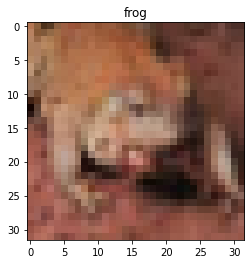

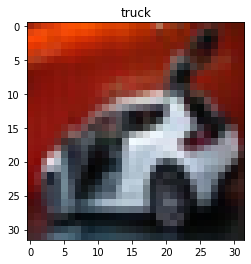

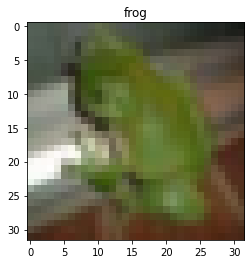

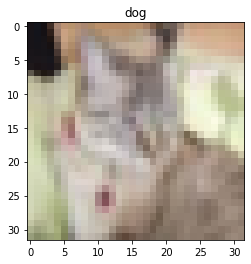

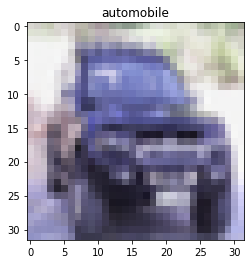

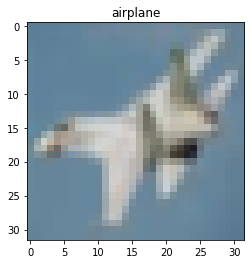

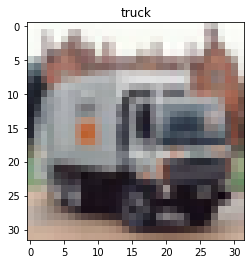

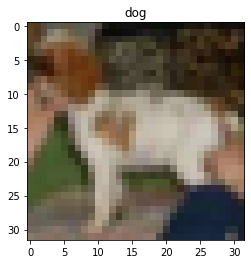

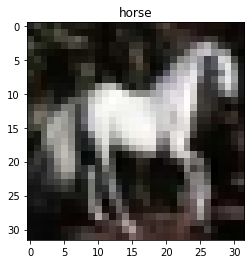

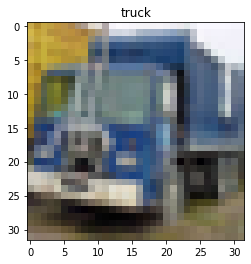

In [102]:
for i in range(15):
    plt.imshow(test_images[i])
    plt.title(classes[predicted[i]])
    plt.show()